In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import streamlit as st

# Load CSV

In [2]:
dataset = pd.read_csv('C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/Training.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
dataset.shape

(4920, 133)

In [5]:
dataset.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
dataset.duplicated

<bound method DataFrame.duplicated of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0      

In [7]:
dataset = dataset.drop_duplicates()

In [8]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
X = dataset.drop(["prognosis"], axis=1)
y = dataset["prognosis"]

# Standardizing the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Model Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\nBest Model: {type(best_model).__name__} with Accuracy: {best_accuracy}")

SVC Accuracy: 1.0
RandomForest Accuracy: 1.0
GradientBoosting Accuracy: 0.8360655737704918
KNeighbors Accuracy: 0.9672131147540983

Best Model: SVC with Accuracy: 1.0


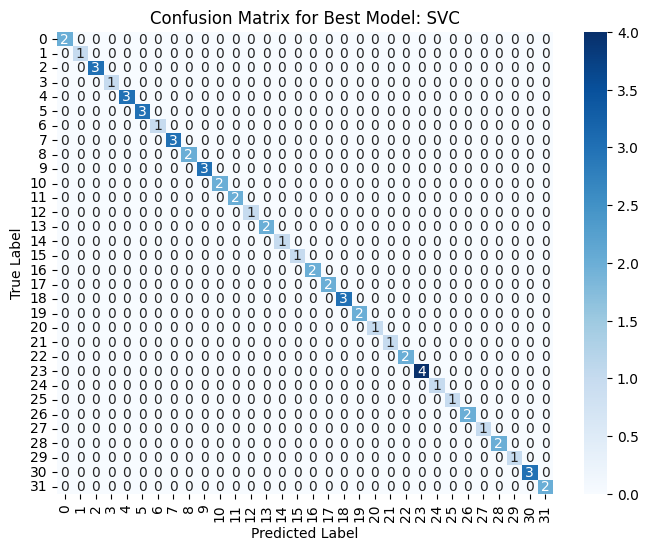

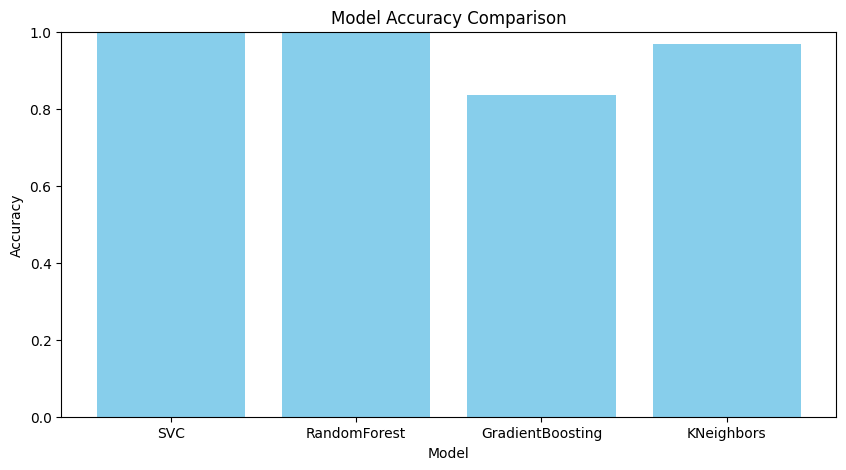

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

best_predictions = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f'Confusion Matrix for Best Model: {type(best_model).__name__}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Save the Model

In [13]:
model_path = "C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/model/svc.pkl"
pickle.dump(best_model, open(model_path, 'wb'))

In [14]:
# Save the MinMaxScaler
with open("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the feature names (column names from X)
with open("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/model/features.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

In [15]:
description = pd.read_csv("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/description.csv")
precautions = pd.read_csv("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/precautions_df.csv")
medications = pd.read_csv("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/medications.csv")
diets = pd.read_csv("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/diets.csv")
workout = pd.read_csv("C:/Users/dipay/OneDrive/Desktop/AI_Healthcare_Chatbot/dataset/workout_df.csv")

In [ ]:
symptoms_dict = {
    'itching': 0,
    'skin_rash': 1,
    'nodal_skin_eruptions': 2,
    'continuous_sneezing': 3,
    'shivering': 4,
    'chills': 5,
    'joint_pain': 6,
    'stomach_pain': 7,
    'acidity': 8,
    'ulcers_on_tongue': 9,
    'muscle_wasting': 10,
    'vomiting': 11,
    'burning_micturition': 12,
    'spotting_ urination': 13,
    'fatigue': 14,
    'weight_gain': 15,
    'anxiety': 16,
    'cold_hands_and_feets': 17,
    'mood_swings': 18,
    'weight_loss': 19,
    'restlessness': 20,
    'lethargy': 21,
    'patches_in_throat': 22,
    'irregular_sugar_level': 23,
    'cough': 24,
    'high_fever': 25,
    'sunken_eyes': 26,
    'breathlessness': 27,
    'sweating': 28,
    'dehydration': 29,
    'indigestion': 30,
    'headache': 31,
    'yellowish_skin': 32,
    'dark_urine': 33,
    'nausea': 34,
    'loss_of_appetite': 35,
    'pain_behind_the_eyes': 36,
    'back_pain': 37,
    'constipation': 38,
    'abdominal_pain': 39,
    'diarrhoea': 40,
    'mild_fever': 41,
    'yellow_urine': 42,
    'yellowing_of_eyes': 43,
    'acute_liver_failure': 44,
    'fluid_overload': 45,
    'swelling_of_stomach': 46,
    'swelled_lymph_nodes': 47,
    'malaise': 48,
    'blurred_and_distorted_vision': 49,
    'phlegm': 50,
    'throat_irritation': 51,
    'redness_of_eyes': 52,
    'sinus_pressure': 53,
    'runny_nose': 54,
    'congestion': 55,
    'chest_pain': 56,
    'weakness_in_limbs': 57,
    'fast_heart_rate': 58,
    'pain_during_bowel_movements': 59,
    'pain_in_anal_region': 60,
    'bloody_stool': 61,
    'irritation_in_anus': 62,
    'neck_pain': 63,
    'dizziness': 64,
    'cramps': 65,
    'bruising': 66,
    'obesity': 67,
    'swollen_legs': 68,
    'swollen_blood_vessels': 69,
    'puffy_face_and_eyes': 70,
    'enlarged_thyroid': 71,
    'brittle_nails': 72,
    'swollen_extremeties': 73,
    'excessive_hunger': 74,
    'extra_marital_contacts': 75,
    'drying_and_tingling_lips': 76,
    'slurred_speech': 77,
    'knee_pain': 78,
    'hip_joint_pain': 79,
    'muscle_weakness': 80,
    'stiff_neck': 81,
    'swelling_joints': 82,
    'movement_stiffness': 83,
    'spinning_movements': 84,
    'loss_of_balance': 85,
    'unsteadiness': 86,
    'weakness_of_one_body_side': 87,
    'loss_of_smell': 88,
    'bladder_discomfort': 89,
    'foul_smell_of urine': 90,
    'continuous_feel_of_urine': 91,
    'passage_of_gases': 92,
    'internal_itching': 93,
    'toxic_look_(typhos)': 94,
    'depression': 95,
    'irritability': 96,
    'muscle_pain': 97,
    'altered_sensorium': 98,
    'red_spots_over_body': 99,
    'belly_pain': 100,
    'abnormal_menstruation': 101,
    'dischromic _patches': 102,
    'watering_from_eyes': 103,
    'increased_appetite': 104,
    'polyuria': 105,
    'family_history': 106,
    'mucoid_sputum': 107,
    'rusty_sputum': 108,
    'lack_of_concentration': 109,
    'visual_disturbances': 110,
    'receiving_blood_transfusion': 111,
    'receiving_unsterile_injections': 112,
    'coma': 113,
    'stomach_bleeding': 114,
    'distention_of_abdomen': 115,
    'history_of_alcohol_consumption': 116,
    'fluid_overload.1': 117,
    'blood_in_sputum': 118,
    'prominent_veins_on_calf': 119,
    'palpitations': 120,
    'painful_walking': 121,
    'pus_filled_pimples': 122,
    'blackheads': 123,
    'scurring': 124,
    'skin_peeling': 125,
    'silver_like_dusting': 126,
    'small_dents_in_nails': 127,
    'inflammatory_nails': 128,
    'blister': 129,
    'red_sore_around_nose': 130,
    'yellow_crust_ooze': 131
}
diseases_list = {
    0: '(vertigo) Paroymsal  Positional Vertigo',
    1: 'AIDS',
    2: 'Acne',
    3: 'Alcoholic hepatitis',
    4: 'Allergy',
    5: 'Arthritis',
    6: 'Bronchial Asthma',
    7: 'Cervical spondylosis',
    8: 'Chicken pox',
    9: 'Chronic cholestasis',
    10: 'Common Cold',
    11: 'Dengue',
    12: 'Diabetes ',
    13: 'Dimorphic hemmorhoids(piles)',
    14: 'Drug Reaction',
    15: 'Fungal infection',
    16: 'GERD',
    17: 'Gastroenteritis',
    18: 'Heart attack',
    19: 'Hepatitis B',
    20: 'Hepatitis C',
    21: 'Hepatitis D',
    22: 'Hepatitis E',
    23: 'Hypertension ',
    24: 'Hyperthyroidism',
    25: 'Hypoglycemia',
    26: 'Hypothyroidism',
    27: 'Impetigo',
    28: 'Jaundice',
    29: 'Malaria',
    30: 'Migraine',
    31: 'Osteoarthristis',
    32: 'Paralysis (brain hemorrhage)',
    33: 'Peptic ulcer diseae',
    34: 'Pneumonia',
    35: 'Psoriasis',
    36: 'Tuberculosis',
    37: 'Typhoid',
    38: 'Urinary tract infection',
    39: 'Varicose veins',
    40: 'hepatitis A'
}

In [17]:
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for symptom in patient_symptoms:
        if symptom in symptoms_dict:
            input_vector[symptoms_dict[symptom]] = 1
    return diseases_list[best_model.predict([input_vector])[0]]

In [18]:
def helper(disease):
    desc = description[description['Disease'] == disease]['Description'].values
    pre = precautions[precautions['Disease'] == disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values.flatten()
    med = medications[medications['Disease'] == disease]['Medication'].values
    die = diets[diets['Disease'] == disease]['Diet'].values
    wrkout = workout[workout['Disease'] == disease]['workout'].values
    return desc, pre, med, die, wrkout